<h1>Imports</h1>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [ ]:
path = "/media/cipher/EEC07807C077D3F5/Scikit and PyTorch/Datasets/iris.data"
data = pd.read_csv(path, header=None)

In [4]:
#features : extracting 2 out of 4 features that will be used for training
x = data.iloc[0:100,[0,2]].values
#target : sentosa or versicolor
y = data.iloc[:100, 4].values
y = np.where(y=='Iris-setosa',0,1)

<h1>ADALine Model</h1>

In [5]:
class ADALine:
    def __init__(self, etta, n_iter):
        self.etta = etta
        self.n_iter = n_iter
        self.iter_error = np.int64(0)
        self.total_error = np.zeros((n_iter,), dtype=int)
        self.losses = []
        
    def fit(self, x, y):
        self.weights = np.random.normal(loc=0.0, scale=0.01, size=x.shape[1])
        self.bias = np.float64(0.0)
        self.prediction_array = np.empty(y.shape)
        for i in range(self.n_iter):
            for feature, target in zip(x,y):
                prediction = self.predict_output(feature)
                self.optimizer(feature, target, prediction)
            self.total_error[i] = self.iter_error
            self.iter_error = 0

    def predict_output(self, feature):
        if self.weights.dot(feature) + self.bias >= 0.5:
            return 1
        else :
            return 0

    def batch_testing(self, features):
        test_results = np.empty(features.shape[0])
        for idx,feature in enumerate(features):
            test_results[idx] = self.predict_output(feature)
        return test_results

    def optimizer(self, feature, target, prediction):
        if prediction!= target:
            self.iter_error += 1
        error = target - prediction
        for j in range(self.weights.shape[0]):   
            self.weights[j] += self.etta*error*feature[j] 
        self.bias += self.etta*error
        

<h1>Training the model</h1>

[0.03970555 0.10456576]


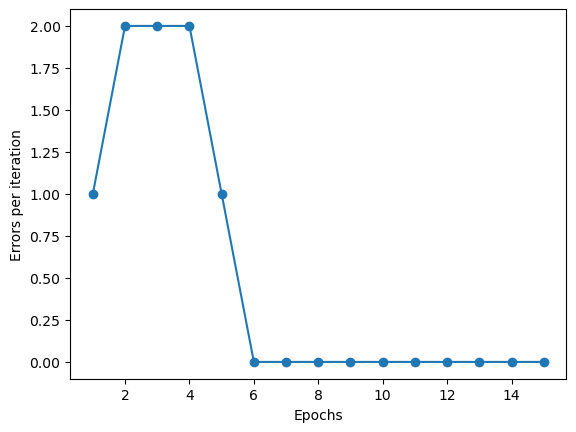

In [21]:
ada = ADALine(etta = 0.01, n_iter = 15)
ada.fit(x,y)
print(ada.weights)
plt.plot(range(1, len(ada.total_error) + 1), ada.total_error, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Errors per iteration')
plt.show()

<h1>Training the model after feature scaling</h1>

In [16]:
x_std = np.copy(x)
x_std[:, 0] = (x[:,0] - x[:,0].mean()) / x[:,0].std()
x_std[:, 1] = (x[:,1] - x[:,1].mean()) / x[:,1].std()

[0.02244297 0.30556487]


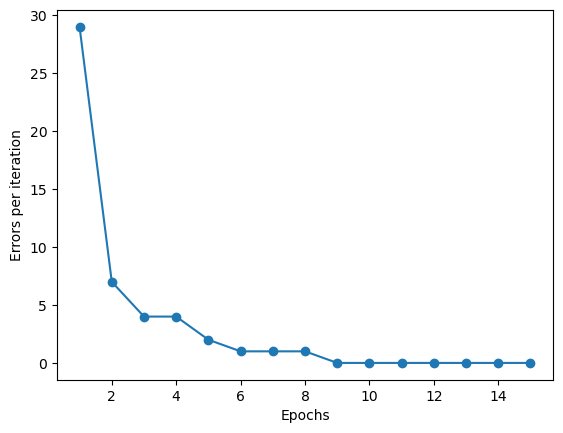

In [17]:
ada = ADALine(etta = 0.01, n_iter = 15)
ada.fit(x_std,y)
print(ada.weights)
plt.plot(range(1, len(ada.total_error) + 1), ada.total_error, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Errors per iteration')
plt.show()

<h1>Visualizing decision boundary</h1>

In [11]:
def plot_decision_regions(X, y, classifier, resolution=0.01):
    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    x2_min, x2_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    lab = classifier.batch_testing(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=x[y == cl, 0], y=x[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=f'Class {cl}', edgecolor='black')
    plt.xlabel('Sepal length [cm]')
    plt.ylabel('Petal length [cm]')
    plt.legend(loc='upper left')
    plt.show()

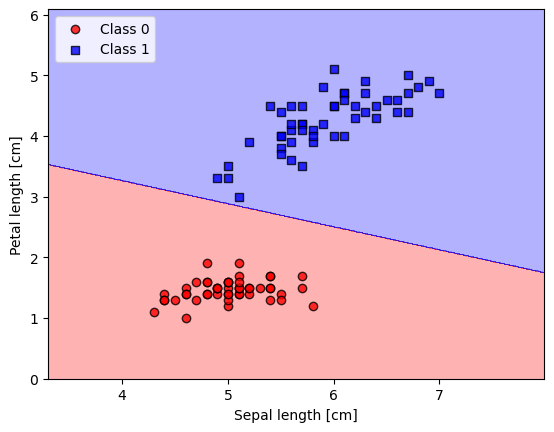

In [22]:
plot_decision_regions(x, y, classifier=ada)